In [2]:
import pandas as pd

logs = pd.read_csv('logs/Experiment 003/version_0/metrics.csv')

logs

,val_loss,val_acc,epoch,step,loss,acc
0,0.311227,0.91250,0,25,NaN,NaN
1,NaN,NaN,1,49,0.164781,0.92
2,0.226237,0.91875,1,51,NaN,NaN
3,0.194624,0.91875,2,77,NaN,NaN
4,NaN,NaN,3,99,0.147614,0.92
5,0.184155,0.91250,3,103,NaN,NaN
6,0.173306,0.93750,4,129,NaN,NaN
7,NaN,NaN,5,149,0.079885,1.00
8,0.179162,0.92500,5,155,NaN,NaN
9,0.181513,0.90625,6,181,NaN,NaN


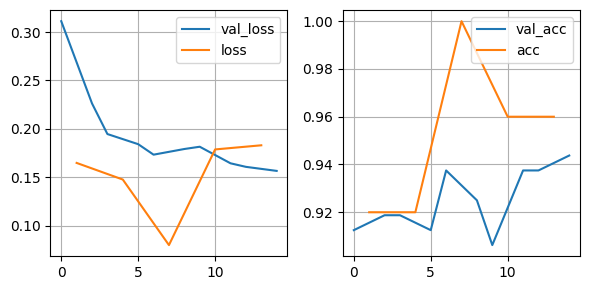

In [3]:
import matplotlib as plt
import matplotlib.pyplot as pltplot

fig = pltplot.figure( figsize = ( 6, 3 ) )
ax = pltplot.subplot( 1, 2, 1 )
logs[ 'val_loss' ].dropna().plot( ax = ax )
logs[ 'loss' ].dropna().plot( ax = ax )
ax.legend( ['val_loss', 'loss' ] )
ax.grid( True )
ax = pltplot.subplot( 1, 2, 2 )
logs[ 'val_acc' ].dropna().plot( ax = ax )
logs[ 'acc' ].dropna().plot( ax = ax )
ax.legend( [ 'val_acc', 'acc' ] )
ax.grid( True )
pltplot.tight_layout()
pltplot.show()

In [4]:
from src import *

module = MNISTModule.load_from_checkpoint( 'checkpoints/006-val_loss=0.15781-epoch=8.ckpt' )
dm = MNISTDataModule( **module.hparams[ 'datamodule' ] )
dm.setup()

In [5]:
import torch

module.eval()
with torch.no_grad():
    preds, labels = torch.tensor( [] ), torch.tensor( [] )
    for imgs, _labels in dm.val_dataloader():
        outputs = module.predict( imgs ) > 0.5
        preds = torch.cat( [ preds, outputs.cpu().long() ] )
        labels = torch.cat( [ labels, _labels ] )

acc = ( preds == labels ).float().mean()
acc.item()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)